In [1]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import imageio
from IPython.display import Image
from gymnasium.envs.toy_text.frozen_lake import generate_random_map

In [ ]:
# training
def train(episodes, lake_size, desc, is_slippery=False):
    
    env = gym.make("FrozenLake-v1", desc=desc, is_slippery=is_slippery, render_mode=None)

    # leere q table initialisieren
    q_table = np.zeros((env.observation_space.n, env.action_space.n))

    rewards_per_episode = []
    epsilon_history = []

    learning_rate = 0.9
    discount_factor = 0.9
    decay_rate = 0.0001
    epsilon = 1.0

    for episode in range(episodes):
        
        state, _ = env.reset()
        terminated = False
        truncated = False

        epsilon_history.append(epsilon)
    
        while (not terminated and not truncated):
            # aktion nach epsilon greedy wählen
            if np.random.uniform(0, 1) < epsilon:
                action = env.action_space.sample()  # zufällig
            else:
                action = np.argmax(q_table[state, :])  # beste 
    
            # step
            new_state, reward, terminated, truncated, _ = env.step(action)
    
            # q table updaten
            q_table[state, action] = q_table[state, action] + learning_rate * (
                reward + discount_factor * np.max(q_table[new_state, :]) - q_table[state, action]
            )
    
            state = new_state
    
        # epsilon über zeit reduzieren
        epsilon = max(epsilon-decay_rate, 0)
    
        rewards_per_episode.append(reward)
    
    env.close()

    return rewards_per_episode, epsilon_history, q_table


In [3]:
def plot_results(episodes, rewards_per_episode, epsilon_history=[]):

    plt.figure(figsize=(12, 6))
    
    sum_rewards = []

    plt.subplot(1, 2, 1)
    for i in range(episodes):
        sum_rewards.append(np.sum(rewards_per_episode[max(0, i-100):(i+1)])/100)
    plt.plot(sum_rewards)
    plt.title('Avg Rewards pro 100 Episoden')
    plt.xlabel('Episoden')
    plt.ylabel('Avg Reward')
    plt.grid(True)

    if epsilon_history:
        plt.subplot(1, 2, 2)
        plt.plot(epsilon_history, color="red")
        plt.title('Epsilon Decay')
        plt.xlabel('Episoden')
        plt.ylabel('Epsilon')
        plt.grid(True)

    plt.tight_layout()
    plt.show()

In [4]:
# q table testen
def test(lake_size, desc, q_table, is_slippery=False):
    env = gym.make("FrozenLake-v1", desc=desc, is_slippery=is_slippery, render_mode="rgb_array")

    state, _ = env.reset()
    terminated = False
    truncated = False
    frames = []
    
    # sonst fehlt erster frame
    frames.append(env.render())
    
    # q table durchgehen und frames speichern
    while (not terminated and not truncated):
        
        action = np.argmax(q_table[state, :])
        
        state, reward, terminated, truncated, _ = env.step(action)
    
        frames.append(env.render())
    
        
    env.close()
    
    # gif speichern und anzeigen
    gif_path = f"ql_{lake_size}x{lake_size}.gif"
    imageio.mimsave(gif_path, frames, duration=1, loop=0)

    return gif_path


In [5]:
lake_size = 4
episodes = 15000

# damit für train und test der selbe lake generiert wird
desc = generate_random_map(size=lake_size)

rewards_per_episode, epsilon_history, q_table = train(episodes=episodes, lake_size=lake_size, desc=desc, is_slippery=False)

q_table

array([[0.531441, 0.59049 , 0.59049 , 0.531441],
       [0.531441, 0.6561  , 0.6561  , 0.59049 ],
       [0.59049 , 0.729   , 0.729   , 0.6561  ],
       [0.6561  , 0.81    , 0.729   , 0.729   ],
       [0.59049 , 0.6561  , 0.6561  , 0.531441],
       [0.59049 , 0.729   , 0.729   , 0.59049 ],
       [0.6561  , 0.      , 0.81    , 0.6561  ],
       [0.729   , 0.9     , 0.81    , 0.729   ],
       [0.6561  , 0.729   , 0.729   , 0.59049 ],
       [0.6561  , 0.81    , 0.      , 0.6561  ],
       [0.      , 0.      , 0.      , 0.      ],
       [0.      , 1.      , 0.9     , 0.81    ],
       [0.729   , 0.729   , 0.81    , 0.6561  ],
       [0.729   , 0.81    , 0.9     , 0.729   ],
       [0.81    , 0.9     , 1.      , 0.      ],
       [0.      , 0.      , 0.      , 0.      ]])

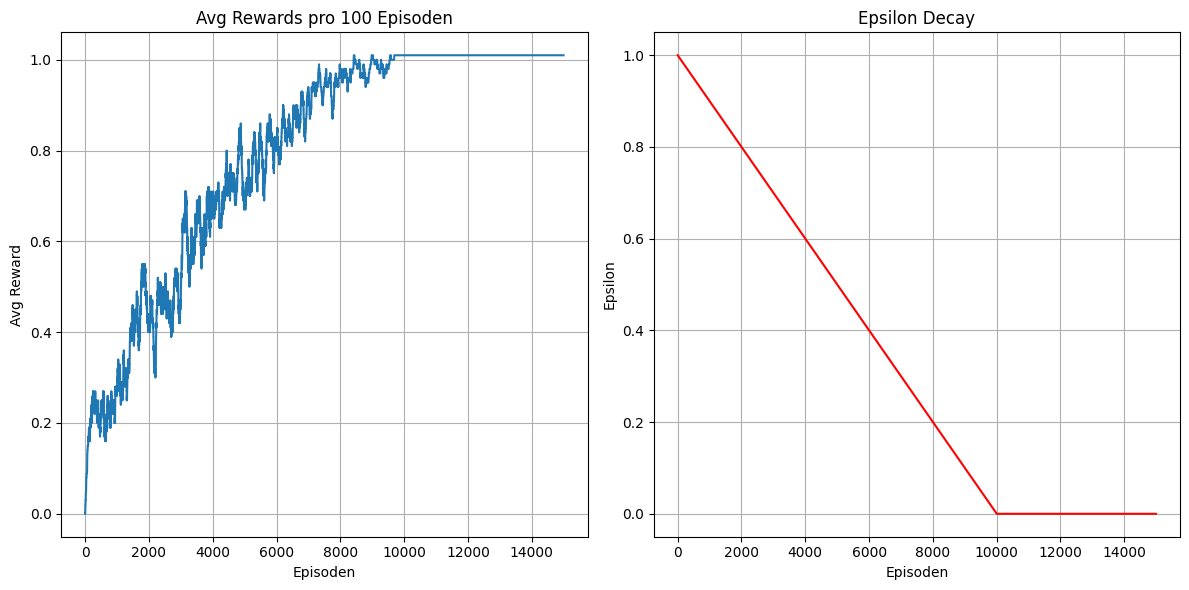

In [6]:
plot_results(episodes, rewards_per_episode, epsilon_history)

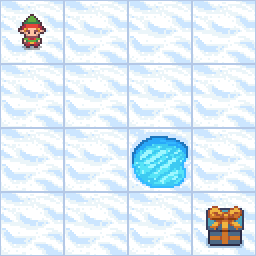

In [7]:
gif_path = test(lake_size, desc, q_table)

Image(filename=gif_path)

In [5]:
lake_size = 8
episodes = 15000

# damit für train und test der selbe lake generiert wird
desc = generate_random_map(size=lake_size)

rewards_per_episode, epsilon_history, q_table = train(episodes=episodes, lake_size=lake_size, desc=desc, is_slippery=False)

q_table

array([[0.22876792, 0.25418658, 0.25418658, 0.22876792],
       [0.22876792, 0.28242954, 0.28242954, 0.25418658],
       [0.25418658, 0.3138106 , 0.3138106 , 0.28242954],
       [0.28242954, 0.34867844, 0.34867844, 0.3138106 ],
       [0.3138106 , 0.38742049, 0.38742049, 0.34867844],
       [0.34867844, 0.43046721, 0.34867844, 0.38742049],
       [0.38742049, 0.        , 0.31381053, 0.34867844],
       [0.34867844, 0.34798452, 0.31380596, 0.31381059],
       [0.25418658, 0.28242954, 0.28242954, 0.22876792],
       [0.25418658, 0.3138106 , 0.3138106 , 0.25418658],
       [0.28242954, 0.34867844, 0.34867844, 0.28242954],
       [0.3138106 , 0.38742049, 0.38742049, 0.3138106 ],
       [0.34867844, 0.43046721, 0.43046721, 0.34867844],
       [0.38742049, 0.4782969 , 0.        , 0.38742049],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.38742049, 0.34867844, 0.3138104 ],
       [0.28242954, 0.3138106 , 0.3138106 , 0.25418658],
       [0.28242954, 0.34867844,

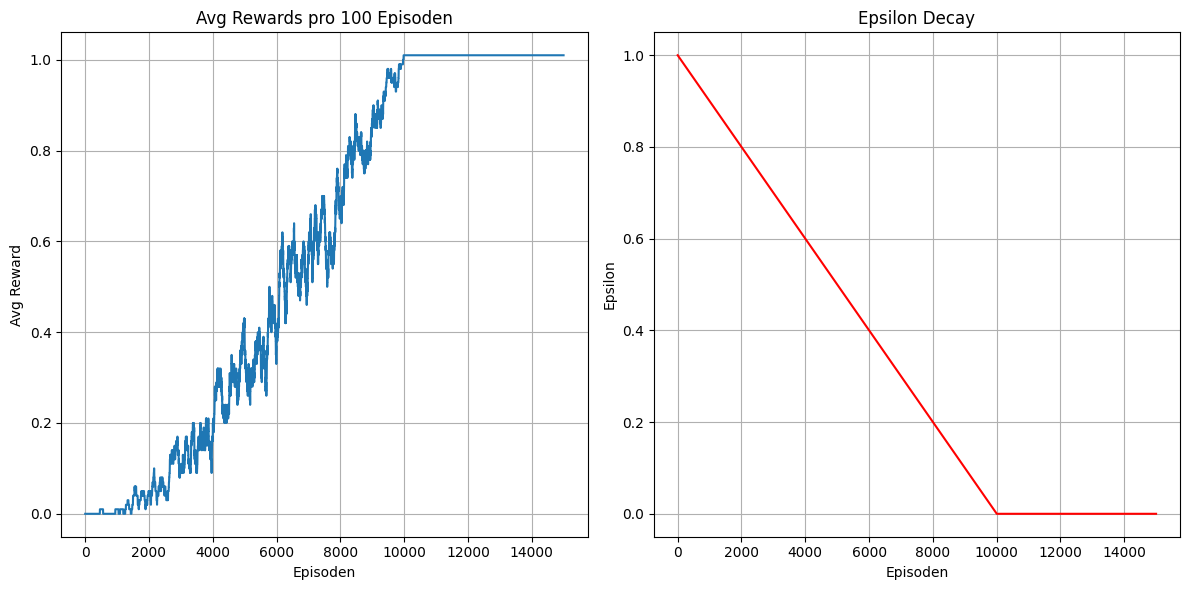

In [6]:
plot_results(episodes, rewards_per_episode, epsilon_history)

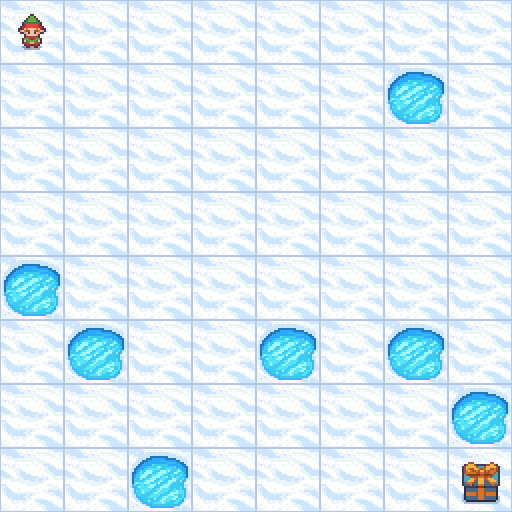

In [7]:
gif_path = test(lake_size, desc, q_table)

Image(filename=gif_path)